<a href="https://colab.research.google.com/github/Koush98/Koush98/blob/main/Toyota_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
url="https://raw.githubusercontent.com/Koush98/Koush98/main/cleaned_toyota1.csv"

df=pd.read_csv(url, encoding='unicode_escape',on_bad_lines='skip')

In [ ]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,Diesel,90.0,1.000000,0,2000,three,1165
1,13750,23.000000,72937.000000,Diesel,90.0,1.000000,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90.0,68647.239972,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90.0,0.000000,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,Petrol,86.0,1.000000,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86.0,0.000000,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86.0,0.000000,0,1300,3,1015
1434,7250,70.000000,68647.239972,Petrol,86.0,1.000000,0,1300,3,1015


In [ ]:
c=df.columns
c

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

<Axes: >

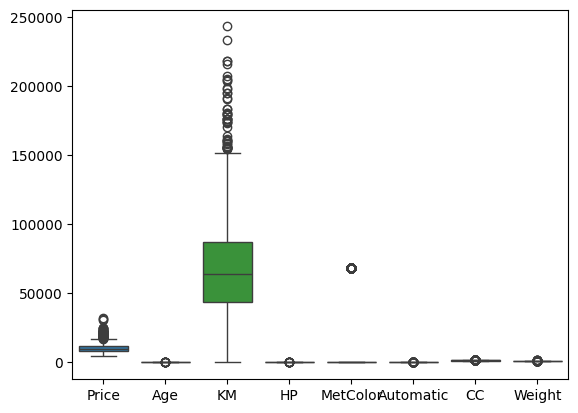

In [ ]:
sns.boxplot(df)

<Axes: xlabel='Price', ylabel='Count'>

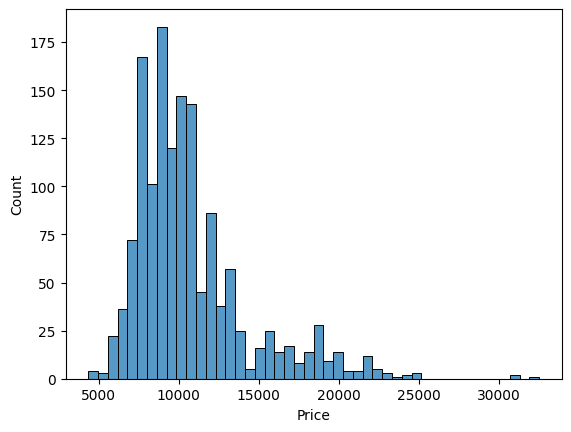

In [ ]:
sns.histplot(df["Price"])

In [ ]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,Diesel,90.0,1.000000,0,2000,three,1165
1,13750,23.000000,72937.000000,Diesel,90.0,1.000000,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90.0,68647.239972,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90.0,0.000000,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,Petrol,86.0,1.000000,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86.0,0.000000,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86.0,0.000000,0,1300,3,1015
1434,7250,70.000000,68647.239972,Petrol,86.0,1.000000,0,1300,3,1015


In [ ]:
# prompt: Using dataframe df: drop price values greater than 30000

df = df[df['Price'] < 30000]

<Axes: >

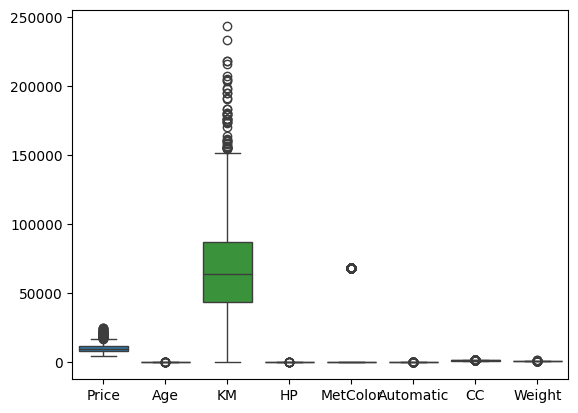

In [ ]:
sns.boxplot(df)

In [ ]:
x = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
df.CC.unique()

array([2000, 1800, 1900, 1600, 1400, 1598, 1995, 1398, 1300, 1587, 1975,
       1332])

In [ ]:
categorical_features = ['FuelType', 'Automatic','MetColor','Doors']
numerical_features = ['Age', 'KM', 'HP', 'CC', 'Weight']

In [ ]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Adding models to the pipeline
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Create a pipeline for each model
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    model_pipeline.fit(x_train, y_train)

    # Predict and evaluate
    y_pred = model_pipeline.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MAE: {mae}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}")
    print("\n")

Linear Regression MAE: 1034.9077523100525
  MSE: 2852375.14
  RMSE: 1688.90
  R²: 0.74


Random Forest MAE: 878.0690708478513
  MSE: 1553238.64
  RMSE: 1246.29
  R²: 0.86


Gradient Boosting MAE: 868.9883314322616
  MSE: 2141777.35
  RMSE: 1463.48
  R²: 0.80




In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline with Random Forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])

# Instantiate the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best model
best_model = grid_search.best_estimator_

Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validation scores
print(f"Cross-validation MAE scores: {-cv_scores}")
print(f"Average cross-validation MAE: {-cv_scores.mean()}")

Cross-validation MAE scores: [834.5363243  997.44174937 825.49221543 923.66346757 871.95936971]
Average cross-validation MAE: 890.6186252778564


In [ ]:
# Train the final model on the entire training set
best_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_model.predict(x_test)

# Evaluate the final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Final Model Evaluation Metrics:")
print(f"  MAE: {mae:.2f}")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.2f}")

Final Model Evaluation Metrics:
  MAE: 844.75
  MSE: 1467962.68
  RMSE: 1211.60
  R²: 0.87


In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Predict on new data (replace new_data with actual new data)
# new_data = pd.DataFrame({...})
# processed_new_data = preprocessor.transform(new_data)
# new_predictions = loaded_model.predict(processed_new_data)

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the saved model
model_path = 'best_random_forest_model.pkl'
loaded_model = joblib.load(model_path)

# Example new data (replace this with actual new data)
new_data = pd.DataFrame({
    'Age': [5],
    'KM': [50000],
    'FuelType': [1],
    'HP': [120],
    'MetColor': [1],
    'Automatic': [0],
    'CC': [1600],
    'Doors': [5],
    'Weight': [1150]
})

# Assuming the preprocessor is the same as defined previously
categorical_features = ['FuelType', 'MetColor', 'Automatic','Doors']
numerical_features = ['Age', 'KM', 'HP', 'CC', 'Weight']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
# Set handle_unknown to 'ignore' to avoid creating new columns for unknown categories
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit the preprocessor on the original training data
# Replace 'x' with the actual training data used to train the model
preprocessor.fit(x)

# Ensure new_data types match original data
# Convert columns in new_data to the correct data types if necessary
for col in categorical_features:
    new_data[col] = new_data[col].astype(str)  # Example: Convert to string if original data was string

# Preprocess the new data using the same preprocessor
processed_new_data = preprocessor.transform(new_data)

# Predict the prices for the new data
new_predictions = loaded_model.predict(processed_new_data)

# Print the predictions
print("Predicted prices for new data:")
print(new_predictions)

ValueError: X has 20 features, but ColumnTransformer is expecting 9 features as input.